In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
train_dir = '/content/drive/MyDrive/Dataset'
test_dir = '/content/drive/MyDrive/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # divides data into batches

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224,224),batch_size=7,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224,224),batch_size=7,class_mode='binary')

Found 259 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'BLU': 0, 'CLN': 1}

In [ ]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))# convolutional layer
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())# convert multidimentional into 1D array
model.add(Dense(512,activation='relu')) # fully connected neural net layer
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# training the model
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,steps_per_epoch=10,epochs=100,validation_data=test_generator)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.4769 - loss: 2.9084 - val_accuracy: 0.5000 - val_loss: 0.7311
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4850 - loss: 0.7314 - val_accuracy: 0.5000 - val_loss: 0.7253
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 999ms/step - accuracy: 0.4190 - loss: 0.7933 - val_accuracy: 0.4333 - val_loss: 0.6850
Epoch 4/100
 7/10 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5383 - loss: 0.6834

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 962ms/step - accuracy: 0.5115 - loss: 0.6858 - val_accuracy: 0.5667 - val_loss: 0.6919
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5868 - loss: 0.8293 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5983 - loss: 0.6813 - val_accuracy: 0.6167 - val_loss: 0.6874
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6242 - loss: 0.7209 - val_accuracy: 0.5333 - val_loss: 0.6907
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 947ms/step - accuracy: 0.6568 - loss: 0.7102 - val_accuracy: 0.4833 - val_loss: 0.7382
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7210 - loss: 0.6217 - val_accuracy: 0.4667 - val_loss: 0.7224
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5858 - loss: 0.6588 - val_accuracy: 0.7167 - val_loss: 0.9955
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6538 - loss: 0.6535 - val_accuracy: 0.8167 - val_los

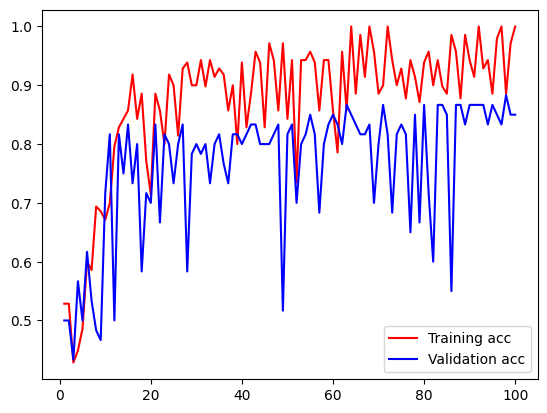

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']



epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'r', label='Training acc')
plt.plot(epochs,val_acc,'b', label='Validation acc')
plt.legend()


plt.show()

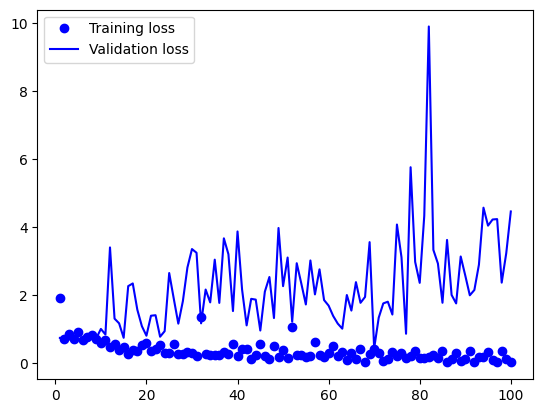

In [ ]:
loss = history.history['loss']
loss_val = history.history['val_loss']

plt.plot(epochs,loss,'bo', label='Training loss')
plt.plot(epochs,loss_val,'b', label='Validation loss')
plt.legend()

plt.show()

In [ ]:
#model.save('blu_vs_cln.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
path = '/content/drive/MyDrive/test/CLN/Cln_0 (11).jpg'
img = image.load_img(path, target_size=(224,224))
plt.imshow(img,interpolation ='nearest')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/test/CLN/Cln_0 (11).jpg'

In [ ]:
import numpy as np

img_array = np.array(img)
img_array.shape


In [ ]:
img_array = img_array.reshape(1,224,224,3)

In [ ]:
a = model.predict(img_array)
print(a)